<div style="direction:rtl;text-align:center;font-size:30px;font-weight:bold">
مقدمة موجزة عن مكتبة باندا    

<p style="direction:rtl;text-align:right">
مكتبة باندا تعتبر ثاني أهم مكتبة في مجال تحليل البيانات باستخدام بايثون. تقوم مكتبة باندا بأتمتة أغلب مهمات تنظيف وتجهيز البيانات المجدولة وكذلك تصوير البيانات (او انتاج الرسوم البيانية). ولذلك يعتبر الإلمام بأساسياتها مهارة لا غنى عنها لتحليل البيانات. يمكننا القول بأن مكتبة باندا تتعامل مع البيانات بشكل يشبه إلى حد كبير جداول برنامج اكسل: حيث تكون البيانات عبارة عن بيانات مجدولة تتكون من صفوف وأعمدة (أي ثنائية الأبعاد). تتضمن المكتبة كذلك عمليات خاصة بالبيانات المتسلسلة أحادية الأبعاد كالسلاسل الزمنية. تستخدم باندا صيغتين أساسيتين للتعامل مع البيانات هما: DataFrame وهي الصيغة المستخدمة لوصف البيانات المجدولة و Series وهي الصيغة المستخدمة لوصف البيانات المتسلسلة. 
<br><br>    
في هذا الدرس سوف نتحدث عن كيفية التعامل مع الباندا: قراءة البيانات، تلخيص البيانات، واستخدام تصوير البيانات لاكتشاف البيانات. 
<br><br>
لاكتشاف المهمات الأساسية في مكتبة باندا، سنستخدم بيانات أسماء المواليد في أمريكا من العام 1890 إلى العام 2014، حيث يحكي هذا الجدول تاريخ تنوع أسماء المواليد في أمريكا صعوداً وهبوطاً بحسب السنة والجنس.
<br><br>   
الخطوة الأولى لاستخدام المكتبة هي في استدعائها عبر الأمر: import. سنقوم كذلك باستدعاء مكتبة الرسم البياني لعمل بعض الرسوم البيانية أثناء هذا الدرس بغرض الإيضاح.
</p>

In [2]:
import pandas as pd # استدعاء باندا


# استدعاء مكتبات الرسم البياني
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline  

<p style="direction:rtl;text-align:right">
هذا الأمر سوف يحضر مكتبة الباندا، ولكن سوف نختصر اسم المكتبة لتصبح pd فقط
</p>

<p style="direction:rtl;text-align:right">
كما تحدثت قبل قليل، تنقسم البيانات في باندا إلى قسمين: جداول البيانات (DataFrame) و القوائم (Series). فماهو الفرق بين الداتا فريم والسيريس؟ الداتا فريم هو أي جدول نتعامل معه يتكون من عدة صفوف وعدة أعمدة. أما السيريس بالمقابل فهي عبارة عن عمود واحد فقط من البيانات. بعبارة أخرى، الداتا فريم هو عبارة عن مجموعة من السيريس (أو مجموعة من الأعمدة) التي يمكن أن نتعامل معها على حدة. هذا الفهم سيلخص لنا العديد من المهام القادمة.
    </p>

- DataFrame: Table, Spreadsheet [Rows + Columns]
- Series   : One column, or series of data

<p style="direction:rtl;text-align:right">
مثلاً يمكننا أن نبدأ بكتابة سيريس بسيطة. الباندا تقرأ تلقائياً أي قوائم بايثونية وتحولها إلى سيريس كما في الأمر التالي
</p>

In [3]:
names = ['Ahmed', 'Mohammed', 'Khalid', 'Ali']
pd.Series(names)

0       Ahmed
1    Mohammed
2      Khalid
3         Ali
dtype: object

<p style="direction:rtl;text-align:right">
هنا قامت باندا بتحويل الأسماء إلى قائمة متسلسلة (سيريس). ولكل اسم معرف محدد خاص به (اندكس) يظهر قبل كل اسم. الآن يمكننا أن نقوم بالعديد من المهام على هذه القائمة.<br /> 
    كيف نستطيع تحويل هذه القائمة إلى جدول بيانات (داتا فريم)؟ لنبدأ بإضافة خانة العمر في قائمة  مختلفة.
    </p>

In [4]:
age = [10, 25, 32, 19]                     # أرقام عشوائية
name_age_dict = {'name': names, 'age':age} # إنشاء دكشنري أولاً..
name_age_df = pd.DataFrame(name_age_dict)

In [5]:
name_age_df

,name,age
0,Ahmed,10
1,Mohammed,25
2,Khalid,32
3,Ali,19


<p style="direction:rtl;text-align:right">
كما نرى تقوم الباندا تلقائياً بقراءة الدكشنري وتحويله إلى جدول عبارة عن مجموعة من الصفوف والأعمدة ولكل صف اندكس أو رمز خاص به وكذلك الأمر بالنسبة للأعمدة.
</p>

<p style="direction:rtl;text-align:right">
في الواقع، نادراً ما ستقوم بإنشاء الجداول بهذه الطريقة، بل سنقرأ جداول جاهزة دائماً من مصادر خارجية. كما في الفصل القادم. 
</p>

<div style="direction:rtl;text-align:right">

# قراءة البيانات والتحقق منها
</div>

<p style="direction:rtl;text-align:right">
    في هذا الدرس، سنقوم بقراءة وتحليل قاعدة بيانات أسماء المواليد في أمريكا من عام 1880 إلى 2014. 
</p>

<p style="direction:rtl;text-align:right">
في الأمر التالي، سنقوم بقراءة ملف خارجي (يحتوي على جدول ضخم ببيانات المواليد) وتسميته ب babynames.
</p>

In [6]:
babynames = pd.read_csv('NationalNames.csv', index_col='Id')

<p style="direction:rtl;text-align:right">
بعد أن قامت الباندا بقراءة الملف، نحن الآن جاهزون لتنفيذ أوامر عديدة على المتغير babynames. مثلاً نريد أن نلقي نظرة على الصفوف الأولى في البيانات لأخذ انطباع عام عن شكل هذه البيانات (وهذه دائماً مهمة جداً للتأكد من قراءة البيانات بشكل صحيح).
<p>

In [7]:
babynames.head()

,Name,Year,Gender,Count
Id,,,,
1,Mary,1880,F,7065
2,Anna,1880,F,2604
3,Emma,1880,F,2003
4,Elizabeth,1880,F,1939
5,Minnie,1880,F,1746


<p style="direction:rtl;text-align:right">
ماذا نرى في الجدول السابق؟ نرى أن لدينا 5 أعمدة وهي: المعرف الخاص بكل صف، الاسم، السنة، الجنس، والعدد (أي عدد مواليد تلك السنة والجنس الذين يحملون الاسم). تبدو لنا البيانات مقروءة بشكل صحيح بما يعني أننا جاهزون للعمل مع هذه البيانات.
    </p>

<p style="direction:rtl;text-align:right">
مثلاً، من أولى المهام التي يجب أن نجريها هي في التأكد من نوع البيانات في كل عمود، والتأكد من حجم البيانات كذلك. لفعل ذلك، سنستخدم الأمر التالي:
</p>

In [8]:
babynames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825433 entries, 1 to 1825433
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Name    object
 1   Year    int64 
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 69.6+ MB


<p style="direction:rtl;text-align:right">
بماذا تخبرنا النتيجة أعلاه؟ تخبرنا أن المعرف يحتوي على 1,825,433 صف. عمود الإسم، يحتوى على بيانات من نوع (object) وهي صيغة في الباندا تستخدم للبيانات النصية. وكذا الأمر بالنسبة لعمودال Gender. أما عمودي الYear و الـ Count فهي تحتوي على بيانات من نوع (int64) أي بيانات عددية. أخيراً، تشغل البيانات الحالية حيزاً من الذاكرة العشوائية قدره حوالي 70 ميغا بايت.
</p>

In [9]:
babynames.shape

(1825433, 4)

<p style="direction:rtl;text-align:right">
يقوم الأمر shape  بسرد نفس المعلومات السابقة ولكن بشكل مختصر جداً، حيث يقوم بسرد عدد الصفوف متبوعاً بعدد الأعمدة.
</p>

<p style="direction:rtl;text-align:right">
قبل أن نشرع في تحليل البيانات، لابد أن نتأكد أنه لا يوجد لدينا أي حقول فارغة. لحساب عدد الحقول الفارغة في كل عمود، سنقوم باستخدام الأمر is_null() متبوعا بالأمر الآخر sum() والذي سيقوم بجمع الحقول الفارغة. لاحقاً سنتعرف على هذه المهام على حدة.
</p>

In [10]:
babynames.isna().sum()

Name      0
Year      0
Gender    0
Count     0
dtype: int64

<div style="direction:rtl;text-align:right">

# تجزئة وتحديد البيانات
</div>

<p style="direction:rtl;text-align:right">
العديد من المهام في تحليل البيانات تتطلب التعامل مع أعمدة محددة أو صفوف محددة، أي تجزئة البيانات. إتقان مهارة تجزئية البيانات واستدعائها بطرق مختلفة يعد خطوة مهمة في مهارة تحليل البيانات. 
<br><br>
في باندا، هناك العديد من الطرق التي نستطيع أن نستدعي فيها عموداً محدداً او صفاً محدداً. نحتاج هذه المهمة فيما لو قررنا أن نأخذ فكرة عن عن محتويات عمود ما ولكن بشكل تفصيلي كما سنرى في السطور القادمة. قبل أن نتعرف على الوظائف، نرى في الخانة التالية طرقاً مختلفة لتحديد صفوف أو أعمدة محددة للتعامل معها. 
</p>

1. df[col] # استدعاء عمود واحد فقط
2. df[[col1, col2]]  # استدعاء عمودين أو أكثر <br> 
3. df.iloc[row,col] # استدعاء قيمة عمود وصف <br>
4. df.iloc[row,:] #استدعاء صف محدد <br>

5. s.iloc[] # استدعاء مجموعة قيم في الاندكس المحدد<br>
6. s.loc[] # استدعاء مجموعة قيم في الموقع المحدد <br>

<p style="direction:rtl;text-align:right">
كما هو موضح في النماذج أعلاه، لنقل أننا نريد أن نستدعي عمود الاسم فقط في قاعدة البيانات babynames:
</p>

In [11]:
babynames['Name'][:10] # only first 10 lines

Id
1          Mary
2          Anna
3          Emma
4     Elizabeth
5        Minnie
6      Margaret
7           Ida
8         Alice
9        Bertha
10        Sarah
Name: Name, dtype: object

<p style="direction:rtl;text-align:right">
ولاستدعاء عدة أعمدة سنقوم بإضافة الأسماء في قائمة ومن ثم تمرير اسم القائمة (او فعل ذلك في سطر واحد فقط).
</p>

In [12]:
cols_list = ['Name', 'Gender']
babynames[cols_list][:10] # only first 10 lines

# OR...
#babynames[['Name', 'Gender']]

,Name,Gender
Id,,
1,Mary,F
2,Anna,F
3,Emma,F
4,Elizabeth,F
5,Minnie,F
6,Margaret,F
7,Ida,F
8,Alice,F
9,Bertha,F


<p style="direction:rtl;text-align:right">
وحين نريد أن نستدعي صفوفاً محددة سنستخدم نفس الأمر ولكن هذه المرة مع إضافة أرقام الصفوف في قائمة.
</p>

In [13]:
rows_list = [1,10,343,5463,10000]
cols_list = ['Name', 'Year', 'Gender', 'Count']

In [14]:
babynames.loc[rows_list, cols_list]

,Name,Year,Gender,Count
Id,,,,
1,Mary,1880,F,7065
10,Sarah,1880,F,1288
343,Isabell,1880,F,22
5463,Erastus,1882,M,14
10000,Lindsay,1884,M,9


<p style="direction:rtl;text-align:right">
نلاحظ في الجدول أعلاه أمرين مختلفين: الملاحظة الأولى هي أننا نستطيع استدعاء صفوف محددة وأعمدة محددة باستخدام الأمر loc. والأمر الآخر هو أننا نبدأ بقائمة الصفوف أولى، ثم قائمة الأعمدة. لاحظ أنه في حال أردنا استدعاء جميع الصفوف أو جميع الأعمدة، فبالإمكان تجاهل قائمة الأعمدة وجعل المكان فارغاً كما في المثال التالي:
</p>

In [15]:
babynames.loc[rows_list,:] 
#babynames.loc[rows_list,]
#babynames.loc[rows_list]

,Name,Year,Gender,Count
Id,,,,
1,Mary,1880,F,7065
10,Sarah,1880,F,1288
343,Isabell,1880,F,22
5463,Erastus,1882,M,14
10000,Lindsay,1884,M,9


<p style="direction:rtl;text-align:right">
جميع الأوامر الثلاثة في الخانة السابقة ستعطي نفس النتيجة، وهي استدعاء جميع الأعمدة لقائمة الصفوف المحددة.
</p>

<div style="direction:rtl;text-align:right">

# الاستدعاء الشرطي
</div>

<p style="direction:rtl;text-align:right">
في أغلب الحالات لن نكون بحاجة إلى استدعاء صفوف محددة بهذا الشكل، بل سنقوم بتحديد "شرط" ما لتحديد كل الصفوف التي تطابق الشرط. ماذا يعني ذلك؟ لنقوم في الأمر التالي بطباعة قائمة مكونة من True أو False لتحديد الصفوف التي توافق أو تخالف الشرط.
</p>

<p style="direction:rtl;text-align:right">
مثلا، لتحديد الصفوف التي تزيد فيها قيمة "Count" عن 90000 نقوم بكتابة التالي:
</p>

In [16]:
rows_list_90000_or_greater = babynames['Count'] >= 90000

In [17]:
rows_list_90000_or_greater[:10] # طباعة أول عشرة قيم فقط

Id
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
Name: Count, dtype: bool

<p style="direction:rtl;text-align:right">
نلاحظ أن جميع قيم القائمة هي إما True للصفوف التي وافقت الشرط، أو False للصفوف التي لم توافق الشرط، نستطيع استخدام هذه القائمة الثنائية لاستدعاء جميع بيانات الصفوف التي توافق الشرط:
</p>

In [18]:
babynames.loc[rows_list_90000_or_greater]

,Name,Year,Gender,Count
Id,,,,
431053,Linda,1947,F,99680
437158,James,1947,M,94755
437159,Robert,1947,M,91642
441425,Linda,1948,F,96205
451660,Linda,1949,F,91010
533140,Michael,1956,M,90633
544603,Michael,1957,M,92709
556177,Michael,1958,M,90519


<p style="direction:rtl;text-align:right">
ولمعرفة عدد الصفوف التي وافقت الشرط (أو عدد مرات الTrue في القائمة) سنقوم بطباعة الأمر التالي:
</p>

In [19]:
rows_list_90000_or_greater.sum()

8

<p style="direction:rtl;text-align:right">
عند إجراء العمليات الحسابية، يقوم بايثون بتحويل كل قيمة True إلى 1 وكل قيمة False إلى 0. وهذا يعني أن مجموع القيم في هذه القائمة هو نفس عدد الصفوف التي وافقت الشرط.
</p>

<p style="direction:rtl;text-align:right">
لأداء نفس الأمر بطريقة مختلفة، لنستخدم الأمر value_counts في باندا والذي يستخدم مع القوائم فقط.
</p>

In [20]:
rows_list_90000_or_greater.value_counts()

False    1825425
True           8
Name: Count, dtype: int64

<p style="direction:rtl;text-align:right">
ماذا لو كان لدينا مجموعة من الشروط؟ بكل بساطة سنقوم بطباعة الشروط بجانب بعضها البعض بإضافة رمز &. فمثلا، في القائمة التالية، سنحفظ قائمة الأسماء الأنثوية ومن ثم إضافة الشرطين.
</p>

In [21]:
rows_list_female_names = babynames['Gender'] == 'F'

In [22]:
rows_list_frequent_and_female = (rows_list_90000_or_greater) & (rows_list_female_names)

In [23]:
babynames[rows_list_frequent_and_female]
#babynames[(rows_list_90000_or_greater) & (rows_list_female_names)]
#babynames[(babynames['Count'] >= 90000) & (babynames['Gender'] == 'F')]

,Name,Year,Gender,Count
Id,,,,
431053,Linda,1947,F,99680
441425,Linda,1948,F,96205
451660,Linda,1949,F,91010


<p style="direction:rtl;text-align:right">
كما يمكن رؤية الطرق المختلفة لطباعة الأمر السابق.
</p>

<p style="direction:rtl;text-align:right">
وبهذا الشكل نستطيع إجراء الكثير من عمليات التحديد: تحديد عمود أو مجموعة أعمدة، تحديد صف أو مجموعة صفوف، تحديد مجموعة أعمدة مع مجموعة صفوف، وأخيراً التحديد الشرطي للصفوف التي توافق شروطاً محددة.
</p>

<div style="direction:rtl;text-align:right">

# الأوامر المتسلسلة

<p style="direction:rtl;text-align:right">
في الأوامر السابقة، اجرينا العديد من المهام لتحديد صفوف محددة أو أعمدة محددة. جميع هذه الأوامر تعطينا في المقابل إما داتا فريم أو سيريس. وبالتالي، نستطيع إجراء نفس الأوامر التي نجريها على الصفوف أو الأعمدة. مثلاً، لطباعة المتوسط الحسابي لعمود ما، سنقوم بإضافة الأمر mean() بعد الداتا فريم أو السيريس:
</p>

In [24]:
babynames['Count'].mean()

184.68792116719703

<p style="direction:rtl;text-align:right">
كما نستطيع أيضاً استخدام ذات الأمر مع مجموعة جزئية. فمثلاً لمعرفة متوسط قائمة الأسماء بحسب الجنس سنقوم أولا بتحديد عدد الأسماء للذكور وحساب المتوسط، ثم نفعل ذات الأمر مع الإناث
</p>

In [25]:
babynames['Count'][babynames['Gender']=='M'].mean()
#babynames.loc[babynames['Gender']=='M', 'Count'].mean()

228.6587549579832

In [26]:
babynames['Count'][babynames['Gender']=='F'].mean()
#babynames.loc[babynames['Gender']=='F', 'Count'].mean()

154.4541949905841

<p style="direction:rtl;text-align:right">
وهكذا نستطيع أن نرى أن متوسط المرات التي يسمى فيها بأي اسم معين خلال أكثر من مئة وعشرين سنة هي حوالي 185 مرة. لكن هذا المتوسط الكلي الذي يشمل الذكور والإناث. حيث أن متوسط عدد الأسماء الذكورية هو 228 بينما متوسط عدد الأسماء الأنثوية فهو 154 مرة. 
</p>

<p style="direction:rtl;text-align:right">
لفهم هذه الأعداد بشكل أفضل، ربما نحن بحاجة إلى معرفة عدد أسماء الذكور والإناث على حدة. سنقوم في البداية باستخراج قائمة شرطية بالأسماء الذكورية، ثم نجري عملية sum لمعرفة عدد الصفوف التي وافقت الشرط. الطريقة الأخرى نصل إلى ذات النتيجة ولكن باستخدام الأمر value_counts
</p>

In [27]:
(babynames['Gender'] == 'M').sum()

743750

In [28]:
(babynames['Gender'] == 'F').sum()

1081683

In [29]:
babynames['Gender'].value_counts()

F    1081683
M     743750
Name: Gender, dtype: int64

<div style="direction:rtl;text-align:right">

# إجراء العمليات الحسابية
</div>

<p style="direction:rtl;text-align:right">
كما نستطيع إجراء عمليات حسابية على كل عنصر  في العمود. مثلاً، لطباعة كل عمود كنسبة مئوية، نقوم بتقسيم كل قيمة على مجموع القيم في كامل العمود، ومن ثم ضرب الناتج في 100. سنقوم بحفظ النسبة المئوية في متغير جديد اسمه CountPercentage واستعراض أول خمس قيم في هذا المتغير.
</p>

In [30]:
counts_series =babynames['Count']
CountPercentage = (counts_series / counts_series.sum()) * 100

<p style="direction:rtl;text-align:right">
لنقم بطباعة أول خمس قيم للتأكد من نجاح الأمر:
</p>

In [31]:
CountPercentage[:5]  # same as      CountPercentage[0:5] 

Id
1    0.002096
2    0.000772
3    0.000594
4    0.000575
5    0.000518
Name: Count, dtype: float64

<p style="direction:rtl;text-align:right">
كما نستطيع إنشاء أعمدة جديدة بحسب متطلبات جديدة. لنفترض مثلاً أني أريد أن أنشئ عموداً جديداً يوضح ما إن كان العام بعد 1950 أو قبله، سنقوم بكتابة التالي:
</p>

In [32]:
babynames['After_1950'] = babynames['Year'] >= 1950

In [33]:
#كويز،  انشاء عمود اخر للكاونت
babynames['frequent'] = babynames['Count'] > babynames['Count'].mean()

In [34]:
babynames.head()

,Name,Year,Gender,Count,After_1950,frequent
Id,,,,,,
1,Mary,1880,F,7065,False,True
2,Anna,1880,F,2604,False,True
3,Emma,1880,F,2003,False,True
4,Elizabeth,1880,F,1939,False,True
5,Minnie,1880,F,1746,False,True



<p style="direction:rtl;text-align:right">
كما نلاحظ، نستطيع كذلك تخزين بيانات تطابق شرطا او شروطا محددة في متغير آخر ونتعامل معه بأريحية. هذه الميزة مفيدة جداً في أغلب مهام تحليل البيانات كما سنشرح ذلك خلال هذا الدرس والدروس القادمة. في كل مرة نغير فيها البيانات، لابد أن نتأكد من حجم البيانات (عدد الأعمدة وعدد الصفوف). بما أننا حددنا عدداً من الصفوف التي توافق شرط تجاوز قيمة 500، فستكون الصفوف الجديدة أقل من صفوف البيانات الأصلية. لنفعل ذلك، نقوم باستخدام shape لطباعة عدد الصفوف متبوعاً بعدد الأعمدة.
</p>

In [35]:
gender_counts = babynames['Gender'].value_counts()
gender_counts

F    1081683
M     743750
Name: Gender, dtype: int64

<p style="direction:rtl;text-align:right">
وهذا الآن يعطينا "سيريس"جديدة فيها عدد كل من الميل والفيميل. كما نلاحظ، فهناك نسبة كبيرة من عدد الفيميلز، ولكن يمكن تحويلها إلى نسبة باتباع نفس الخطوات في الأمر السابق.
</p>

In [36]:
gender_counts / gender_counts.sum()

F    0.592562
M    0.407438
Name: Gender, dtype: float64

In [37]:
babynames['frequent'].value_counts() / babynames.shape[0]

False    0.917454
True     0.082546
Name: frequent, dtype: float64

<p style="direction:rtl;text-align:right">
كما نرى، فالإناث تقريبا ٦٠ ٪ من البيانات بينما أسماء الذكور هي ٤٠ بالمئة. لكن، نريد أن نعرف عدد المواليد بالكامل بحسب الجنس. كم هو عدد المواليد الذكور (وليس عدد الأسماء فقط) وعدد الإناث ؟ لهذا الأمر سنستخدم إحدى أقوى الأوامر في باندا والتي تميزها عن غيرها من مكتبات البيانات، ألا وهو "قروب باي".
</p>

<p style="direction:rtl;text-align:right">
لدينا أيضاً إمكانية الفلترة باستخدام أكثر من شرط. مثلاً، نريد أن يكون عدد الأسماء أكثر من 500 اسم ولكن نريد فقط بيانات بعد عام 1950. في هذه الحالة، سنضيف الشرط الآخر داخل القوس المعكوف، ونستخدم الرمز & للاشتراط.
</p>

In [38]:
babynames_frequent_names_after_1950 = babynames[(babynames['Count'] >= 1000) & (babynames['Year']>=1950)]
babynames[(babynames['frequent'] & babynames['After_1950'])]

,Name,Year,Gender,Count,After_1950,frequent
Id,,,,,,
461922,Linda,1950,F,80431,True,True
461923,Mary,1950,F,65460,True,True
461924,Patricia,1950,F,47945,True,True
461925,Barbara,1950,F,41558,True,True
461926,Susan,1950,F,38022,True,True
...,...,...,...,...,...,...
1812509,Kamren,2014,M,187,True,True
1812510,Tadeo,2014,M,187,True,True
1812511,Avi,2014,M,186,True,True


In [39]:
babynames_frequent_names_after_1950.head()

,Name,Year,Gender,Count,After_1950,frequent
Id,,,,,,
461922,Linda,1950,F,80431,True,True
461923,Mary,1950,F,65460,True,True
461924,Patricia,1950,F,47945,True,True
461925,Barbara,1950,F,41558,True,True
461926,Susan,1950,F,38022,True,True


In [40]:
babynames_frequent_names_after_1950.shape

(34883, 6)

<div style="direction:rtl;text-align:right">

# ترتيب الصفوف بحسب القيمة
</div>

<p style="direction:rtl;text-align:right">
باندا أيضا فيها امكانية فرز الصفوف تصاعديا او تنازليا. وهذه المهمة أساسية وذلك لمعرفة حدود البيانات: ماهي القيم الكبيرة وماهي القيم الصغيرة ؟ وهل يمكن إعادة ترتيب الجدول بناء على هذه الأرقام؟ 
    <br />
    لفرز البيانات بحسب الأسماء الأكثر اشيوعا نقوم باستخدام sort_values والتي تقوم بهذه المهمة نيابة عنا. لكن لاحظ أننا نستخدمها هنا على الجدول كاملاً ثم على العمود فقط:
</p>

In [41]:
babynames.sort_values(by='Count', ascending=False)[:5] # print only first 5 (top values)

,Name,Year,Gender,Count,After_1950,frequent
Id,,,,,,
431053,Linda,1947,F,99680,False,True
441425,Linda,1948,F,96205,False,True
437158,James,1947,M,94755,False,True
544603,Michael,1957,M,92709,True,True
437159,Robert,1947,M,91642,False,True


In [42]:
#same with series
babynames['Count'].sort_values(ascending=False)[:5]

Id
431053    99680
441425    96205
437158    94755
544603    92709
437159    91642
Name: Count, dtype: int64

<p style="direction:rtl;text-align:right">
نلاحظ عدة أمور في الأمر السابق:
<br />
أولاً قمنا باستخدام sort_values. وداخل هذا الأمر، نقوم بتحديد العمود الذي يتم الفرز على أساسه، واختيار هل هو فرز تصاعدي أم تنازلي وذلك بتحديد قيمة ascending إلى True أو False. ثانيا، بعد الأمر، وكما هي الحال في سائر أوامر باندا، نستطيع كتابة أمر آخر ليطبق على النتيجة. في السطر أعلاه، قمنا بتحديد أول خمسة صفوف لإلقاء نظرة على رأس الجدول. كما يمكننا استخدام أمر إيجاد المتوسط الحسابي أو الحجم. 
</p>

<div style="direction:rtl;text-align:right">

# عمليات التجميع
</div>

<p style="direction:rtl;text-align:right">
حين نتعامل مع البيانات فدائماً ما نواجه مهمة حساب قيمة معينة بالنسبة لكل صنف (مثلا جنس أو سنة). وهذا يعني أننا بحاجة إلى طريقة نستطيع بها إجراء العمليات الحسابية أو المهام البرمجية لكل صنف على حدة.
</p>

<p style="direction:rtl;text-align:right">
مثلاً، نريد أن نحسب متوسط عدد الأسماء ( Count ) بالنسبة لكل جنس على حدة. للقيام لذلك، سنقوم بكتابة الأمر التالي:
</p>

In [43]:
agg_gender_records = babynames.groupby('Gender')
agg_gender_records_count = agg_gender_records['Count']
agg_gender_records_mean_count = agg_gender_records_count.mean()

#babynames.groupby('Gender')['Count'].mean()

In [44]:
agg_gender_records_mean_count

Gender
F    154.454195
M    228.658755
Name: Count, dtype: float64

<p style="direction:rtl;text-align:right">
ماذا فعلنا بالتحديد؟ في البداية قمنا بإنشاء groupby object بحيث نقوم بتعريف المتغير الذي نود تقسيم البيانات على أساسه. لنلاحظ أن عناصر هذا المتغير (مثلاً الجنس أو السنة) ستكون هي المعرفات الجديدة (اندكس) للقائمة الناتجة. وبعد ذلك، نحدد العمود أو القائمة التي نود إجراء الحسابات عليها ومن ثم نختار الأمر المرغوب.
</p>

<p style="direction:rtl;text-align:right">
يمكننا كذلك إضافة أكثر من عنصر للتجميع. فمثلا، لو أردنا متوسط عدد الأسماء، بحسب السنة ثم بحسب الجنس. ما علينا لتنفيذ ذلك سوى كتابة التالي:
</p>

In [45]:
babynames.groupby(['Year','Gender'])['Count'].mean()

Year  Gender
1880  F          96.595541
      M         104.433837
1881  F          98.031983
      M         101.048144
1882  F         104.912451
                   ...    
2012  M         132.907569
2013  F          90.945704
      M         134.275121
2014  F          92.766298
      M         136.036059
Name: Count, Length: 270, dtype: float64

<p style="direction:rtl;text-align:right">
نرى في الأمر السابق أن متوسط العدد يتم حسابه في كل سنة وكل جنس. ولكن لنلاحظ أن المعرفات اختلفت وصارت بالسنة أولا ثم بالجنس ثانيا.
</p>

In [46]:
babynames.groupby(['After_1950', 'Gender']).mean()

Year       Count  frequent
After_1950 Gender                                   
False      F       1923.613286  201.321477  0.098101
           M       1923.505643  227.928440  0.095219
True       F       1988.847169  139.857882  0.072485
           M       1989.836516  228.936730  0.085709

<div style="direction:rtl;text-align:right">

# تحوير البيانات عبر Pivoting

</div>

<p style="direction:rtl;text-align:right">
لعل واحدة من أهم ميزات باندا هي القدرة على إجراء عمليات تحوير البيانات (pivoting) بشكل سلس جدا. في البداية ماذا نقصد بتحوير البيانات؟ هي عملية شبيهة بالتجميع إلى حد كبير، ولكن الناتج فيها هو جدول آخر وليس فقط قائمة (كما في الأمر السابق). هذه المرة الناتج سيكون جدول يحوي على الصفوف والأعمدة وليس قائمة طويلة.
</p>

<p style="direction:rtl;text-align:right">
قارن بين ناتج الأمر السابق:
</p>

In [47]:
babynames.groupby(['Year', 'Gender'])['Count'].mean()[:10]

Year  Gender
1880  F          96.595541
      M         104.433837
1881  F          98.031983
      M         101.048144
1882  F         104.912451
      M         103.446770
1883  F         106.566414
      M         101.581553
1884  F         110.087031
      M         101.728889
Name: Count, dtype: float64

<p style="direction:rtl;text-align:right">
وبين الأمر التالي:
</p>

In [48]:
babynames.pivot_table(values='Count', index='Year', columns='Gender', aggfunc='mean')[:5]

Gender,F,M
Year,,
1880,96.595541,104.433837
1881,98.031983,101.048144
1882,104.912451,103.446770
1883,106.566414,101.581553
1884,110.087031,101.728889


<p style="direction:rtl;text-align:right">
هل لاحظت الفرق؟ الفرق الوحيد هو في ترتيب الناتج. ففي حين أن GroupBy ينتج عنه قائمة أخرى ولكن بتعريف مختلف للمعرف، في أمر pivot_table نجد أن الناتج هو جدول بحيث تكون فيه العناصر عبارة عن صفوف وأعمدة.
</p>

<p style="direction:rtl;text-align:right">
لاحظ أننا نستطيع استخدام ناتج التجميع في عمليات أخرى ولكن بعد أن نعيد تعريف كل صف من جديد باستخدام أمر reset_index كما يلي:
</p>

In [49]:
babynames.groupby(['Year', 'Gender'])['Count'].mean()[:10].reset_index()

,Year,Gender,Count
0,1880,F,96.595541
1,1880,M,104.433837
2,1881,F,98.031983
3,1881,M,101.048144
4,1882,F,104.912451
5,1882,M,103.446770
6,1883,F,106.566414
7,1883,M,101.581553
8,1884,F,110.087031
9,1884,M,101.728889


<div style="direction:rtl;text-align:right">

# رسم البيانات

</div>

<p style="direction:rtl;text-align:right">
هناك أكثر من طريقة لرسم البيانات، لكننا سنستخدم أسهل الطرق لرسم البيانات وهي باستخدام مكتبة Seaborn. فمثلاً لو أردنا رسم خطاً يمثل تصاعد اسم محمد سنقوم بالتالي:
</p>

<p style="direction:rtl;text-align:right">
لنبدأ مثلاً برسم متوسط عدد الأسماء خلال كل عام. لعمل ذلك سنحتاج أولاً لحساب متوسط الأسماء كل عام ومن ثم رسم العام في المحور السيني ورسم المتوسط في المحور الصادي.
</p>

In [50]:
names_count_by_year = babynames.groupby('Year')['Count'].count()

<AxesSubplot:xlabel='Year'>

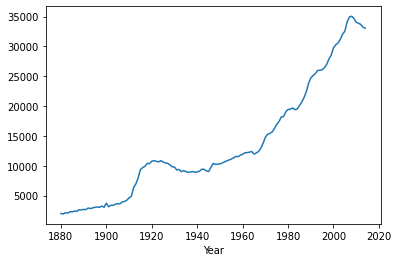

In [51]:
names_count_by_year.plot()

<AxesSubplot:xlabel='Year', ylabel='Count'>

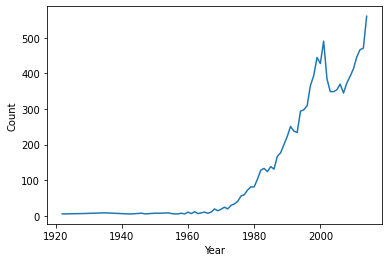

In [52]:
Mohammed = babynames[babynames.Name == 'Mohammed']
sns.lineplot(x='Year', y='Count', data=Mohammed)
#Mohammed.plot(x='Year', y='Count', kind='line')

<AxesSubplot:xlabel='Year'>

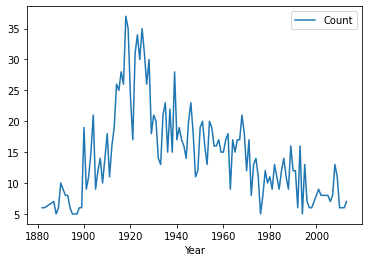

In [53]:
marry = babynames[babynames.Name == 'Marry']
marry.plot(x='Year', y='Count', kind='line')

<AxesSubplot:xlabel='Year'>

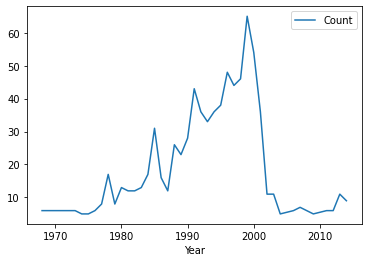

In [54]:
osama = babynames[babynames.Name == 'Osama']
osama.plot(x='Year', y='Count', kind='line')